# Plant Disease Prediction

## Importing libraries

In [2]:
!pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.2 MB 5.1 MB/s eta 0:01:16
   ---------------------------------------- 0.2/385.2 MB 2.7 MB/s eta 0:02:22
   ---------------------------------------- 0.3/385.2 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.3/385.2 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.3/385.2 MB 1.3 MB/s eta 0:05:05
   ---------------------------------------- 0.4/385.2 MB 1.3 MB/s eta 0:04:54
   ---------------------------------------- 0.5/385.2 MB 1.7 MB/s eta 0:03:51
   ---------------------------------------- 0.5/385.2 MB 1.7 MB/s eta 0:03:51
   ---------------------------------------- 0.5/385.2 MB 1.7 MB/s eta 0:03:51
   ---------------------------------------- 0.6/385.2 MB 1.2 MB/s eta 0:05:

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7350 files belonging to 3 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7352 files belonging to 3 classes.


## Building Model

In [6]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\dhatri\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1000,activation='relu'))

In [15]:
#cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

### Compiling and Training Phase

In [21]:
!set TF_USE_LEGACY_KERAS=True


In [23]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     2,049,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,764,227 (25.80 MB)

 Trainable params: 6,764,227 (25.80 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 464s 2s/step - accuracy: 0.6215 - loss: 1.4285 - val_accuracy: 0.9999 - val_loss: 0.0022
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.9912 - loss: 0.0371 - val_accuracy: 0.9924 - val_loss: 0.0538
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - accuracy: 0.9959 - loss: 0.0132 - val_accuracy: 0.9703 - val_loss: 0.1509
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.7850 - loss: 0.5803 - val_accuracy: 0.9921 - val_loss: 0.0198
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - accuracy: 0.9968 - loss: 0.0179 - val_accuracy: 0.9992 - val_loss: 0.0014
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 1.0000 - loss: 1.1773e-04 - val_accuracy: 1.0000 - val_loss: 9.5773e-05
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 1.0000 - loss: 6.0107e-05 - val_accuracy: 1.0000 - val_loss: 9.1469e-06
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 1.0000 - loss: 3

## Evaluating Model

In [28]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

230/230 ━━━━━━━━━━━━━━━━━━━━ 63s 275ms/step - accuracy: 1.0000 - loss: 2.1078e-04
Training accuracy: 1.0


In [29]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

230/230 ━━━━━━━━━━━━━━━━━━━━ 65s 281ms/step - accuracy: 1.0000 - loss: 1.0615e-04
Validation accuracy: 1.0


### Saving Model

In [30]:
cnn.save('trained_plant_disease_model.keras')

In [31]:
training_history.history #Return Dictionary of history

{'accuracy': [0.8239455819129944,
  0.98965984582901,
  0.9908843636512756,
  0.8568707704544067,
  0.9983673691749573,
  0.9998639225959778,
  0.9998639225959778,
  1.0,
  0.9976871013641357,
  0.9702040553092957],
 'loss': [0.5092204213142395,
  0.04212755709886551,
  0.04394837096333504,
  0.3874140977859497,
  0.008914818055927753,
  0.0003819654812105,
  0.0003371753846295178,
  2.22219114220934e-05,
  0.008949626237154007,
  0.13458915054798126],
 'val_accuracy': [0.9998639822006226,
  0.9923830032348633,
  0.9703481793403625,
  0.9921109676361084,
  0.9991838932037354,
  1.0,
  1.0,
  1.0,
  0.9058759808540344,
  1.0],
 'val_loss': [0.0021534650586545467,
  0.053827136754989624,
  0.15086711943149567,
  0.019772931933403015,
  0.0013784891925752163,
  9.577272430760786e-05,
  9.146918273472693e-06,
  1.888422161755443e-06,
  0.25943854451179504,
  0.00012699169747065753]}

In [32]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [33]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

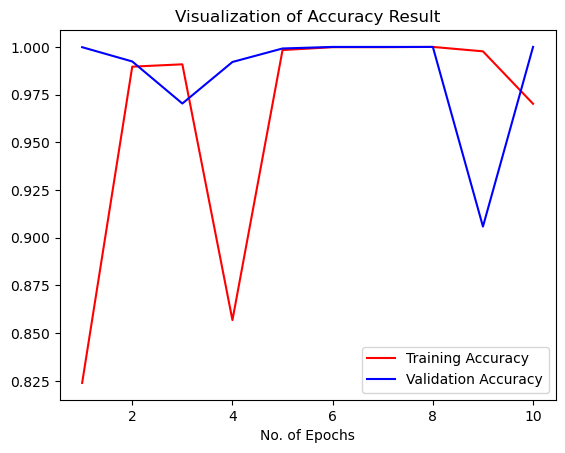

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7352 files belonging to 3 classes.


In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

7352/7352 ━━━━━━━━━━━━━━━━━━━━ 244s 33ms/step


In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
Y_true

<tf.Tensor: shape=(7352,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [40]:
predicted_categories

<tf.Tensor: shape=(7352,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [42]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

    Healthy_Leaf_Rose       1.00      1.00      1.00      2450
            Rose_Rust       1.00      1.00      1.00      2451
Rose_sawfly_Rose_slug       1.00      1.00      1.00      2451

             accuracy                           1.00      7352
            macro avg       1.00      1.00      1.00      7352
         weighted avg       1.00      1.00      1.00      7352



### Confusion Matrix Visualization

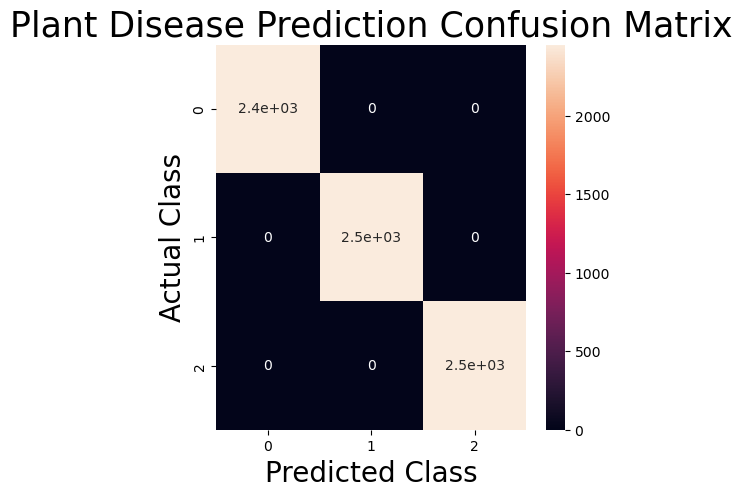

In [48]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()